In [22]:
# Homework 6 Template
# G. Besla & R. Li

In [40]:
# import modules
import numpy as np
import astropy.units as u
from astropy.constants import G

# import plotting modules
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

# my modules
from ReadFile import Read
# Step 1: modify CenterOfMass so that COM_P now takes a parameter specifying 
# by how much to decrease RMAX instead of a factor of 2
from CenterOfMass2 import CenterOfMass

In [24]:
def OrbitCOM(galaxy, start, end, n):
    """function that loops over all the desired snapshots to compute the COM pos and vel as a function of time.
    
    Parameters
    ----------
        galaxy: str 
            The name of the galaxy. "MW", "M31", or "M33".
        start: int
            The number of the first snapshot to be read in.
        end: int
            The number of the last snapshot to be read in.
        n: int
            The intervals over which the function will return COM.
    """
    
    # compose the filename for output
    fileout = "Orbit_" + galaxy + ".txt"
    
    #  set tolerance and VolDec for calculating COM_P in CenterOfMass
    # for M33 that is stripped more, use different values for VolDec
    delta = 0.1
    if galaxy != "M33":
        volDec = 2
    else:
        volDec = 4
    
    # generate the snapshot id sequence 
    # it is always a good idea to also check if the input is eligible (not required)
    snap_ids = np.arange(start, end, n)
    if snap_ids.size == 0:
        print("Check your start, end, or n values.")
        pass
    
    # initialize the array for orbital info: t, x, y, z, vx, vy, vz of COM
    orbit = np.zeros([snap_ids.size, 7])
    
    # a for loop 
    for i, snap_id in enumerate(snap_ids):  # loop over files
        
        # compose the data filename (be careful about the folder)
        # add a string of the filenumber to the value “000”
        ilbl = '000' + str(snap_id)
        # remove all but the last 3 digits
        ilbl = ilbl[-3:]
        filename= "Data/"+ "%s_"%(galaxy) + ilbl + '.txt'
        
        # Initialize an instance of CenterOfMass class, using disk particles
        COM = CenterOfMass(filename, 2)
        
        # Store the COM pos and vel. Remember that now COM_P required VolDec
        COM_p = COM.COM_P(delta, volDec)
        COM_v = COM.COM_V(COM_p[0], COM_p[1], COM_p[2])
    
        # store the time, pos, vel in ith element of the orbit array,  without units (.value) 
        # note that you can store 
        # a[i] = var1, *tuple(array1)
        orbit[i, 0] = COM.time.value/1000     # Storing time in Gyr
        orbit[i, 1] = COM_p[0].value          # Storing COM x-coordinate
        orbit[i, 2] = COM_p[1].value          # Storing COM x-coordinate
        orbit[i, 3] = COM_p[2].value          # Storing COM x-coordinate
        orbit[i, 4] = COM_v[0].value          # Storing COM x-velocity
        orbit[i, 5] = COM_v[1].value          # Storing COM y-velocity
        orbit[i, 6] = COM_v[2].value          # Storing COM z-velocity
        
        # print snap_id to see the progress
        print(snap_id)
        
    # write the data to a file
    # we do this because we don't want to have to repeat this process 
    # this code should only have to be called once per galaxy.
    np.savetxt(fileout, orbit, fmt = "%11.3f"*7, comments='#',
               header="{:>10s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}"\
                      .format('t', 'x', 'y', 'z', 'vx', 'vy', 'vz'))

In [25]:
# Recover the orbits and generate the COM files for each galaxy
# read in 800 snapshots in intervals of n=5
# Note: This might take a little while - test your code with a smaller number of snapshots first! 
print("MW:")
OrbitCOM("MW", 0, 801, 5)

print("\n M31:")
OrbitCOM("M31", 0, 801, 5)

print("\n M33:")
OrbitCOM("M33", 0, 801, 5)

MW:
0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200
205
210
215
220
225
230
235
240
245
250
255
260
265
270
275
280
285
290
295
300
305
310
315
320
325
330
335
340
345
350
355
360
365
370
375
380
385
390
395
400
405
410
415
420
425
430
435
440
445
450
455
460
465
470
475
480
485
490
495
500
505
510
515
520
525
530
535
540
545
550
555
560
565
570
575
580
585
590
595
600
605
610
615
620
625
630
635
640
645
650
655
660
665
670
675
680
685
690
695
700
705
710
715
720
725
730
735
740
745
750
755
760
765
770
775
780
785
790
795
800

 M31:
0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200
205
210
215
220
225
230
235
240
245
250
255
260
265
270
275
280
285
290
295
300
305
310
315
320
325
330
335
340
345
350
355
360
365
370
375
380
385
390
395
400
405
410
415
420
425
430
435
440
445
450
455
460
465
470
475
480
4

In [32]:
# Read in the data files for the orbits of each galaxy that you just created
# headers:  t, x, y, z, vx, vy, vz
# using np.genfromtxt

MW_COM = np.genfromtxt("Orbit_MW.txt")
M31_COM = np.genfromtxt("Orbit_M31.txt")
M33_COM = np.genfromtxt("Orbit_M33.txt")

In [47]:
# function to compute the magnitude of the difference between two vectors 
# You can use this function to return both the relative position and relative velocity for two 
# galaxies over the entire orbit  
def relative_vector_mag(vec1, vec2):
    """
    This function compute the magnitude of the difference between two vectors.
    
    Parameters
    ----------
    vec1: numpy.array
        Numpy array containing the components of the first vector.
    vec2: numpy.array
        Numpy array containing the components of the second vector.
    
    Returns
    -------
    rel_mag: float
        Magnitude of the difference between two vectors.
    """
    rel_vec = vec1 - vec2
    
    sum_of_square = 0
    for comp in rel_vec:
        sum_of_square += comp**2
    
    rel_mag = np.sqrt(sum_of_square)
    
    return rel_mag

In [48]:
# Determine the magnitude of the relative position and velocities of

MW_M31_rel_position = []
MW_M31_rel_velocity = []

M33_M31_rel_position = []
M33_M31_rel_velocity = []

time = []

for i in range(len(MW_COM)):
    
    # MW and M31
    MW_M31_rel_position.append(relative_vector_mag(MW_COM[i,1:4], M31_COM[i,1:4]))
    MW_M31_rel_velocity.append(relative_vector_mag(MW_COM[i,4:], M31_COM[i,4:]))
    
    # M33 and M31
    M33_M31_rel_position.append(relative_vector_mag(M33_COM[i,1:4], M31_COM[i,1:4]))
    M33_M31_rel_velocity.append(relative_vector_mag(M33_COM[i,4:], M31_COM[i,4:]))
    
    # time
    time.append(MW_COM[i,0])

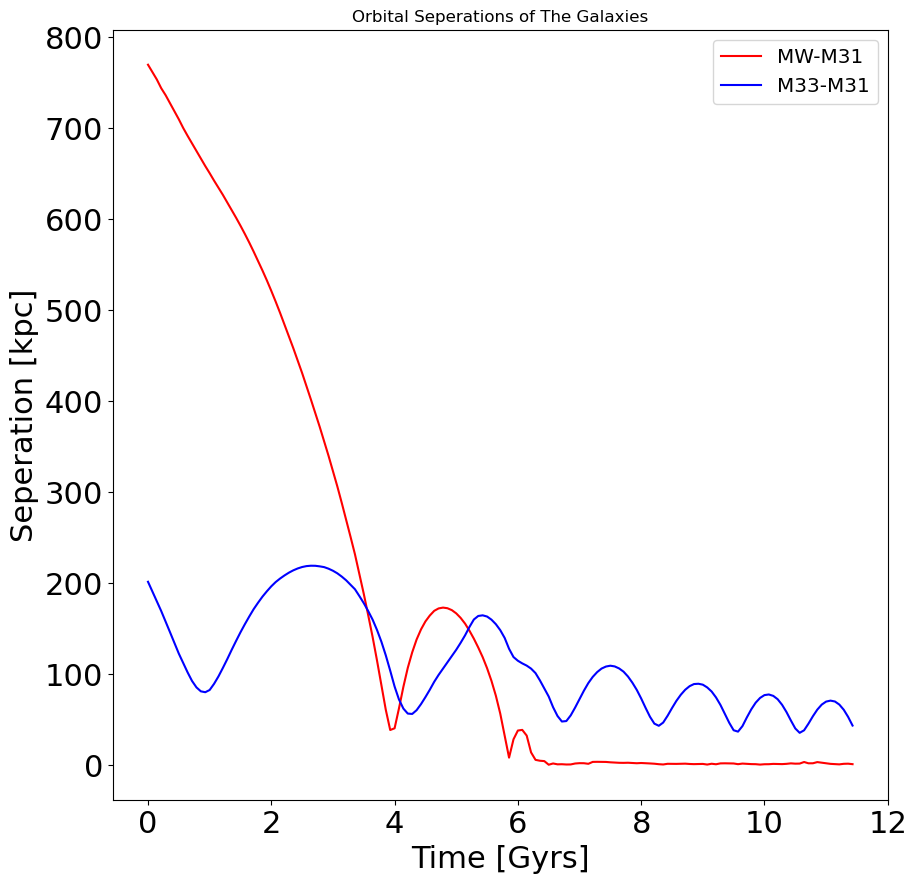

In [69]:
# Plot the Orbit of the galaxies 
#################################
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)

# Plotting:
plt.plot(time, MW_M31_rel_position, color="red", label="MW-M31")
plt.plot(time, M33_M31_rel_position, color="blue", label="M33-M31")

# Adding Title:
plt.title("Orbital Seperations of The Galaxies")

# Adding axis labels
plt.xlabel('Time [Gyrs]', fontsize=22)
plt.ylabel('Seperation [kpc]', fontsize=22)

#plt.yscale("log")

# Adjusting tick label font size
label_size = 22
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size

# Adding a legend with some customizations
legend = ax.legend(loc='upper right',fontsize='x-large')

plt.savefig('orbital_seperation.png')

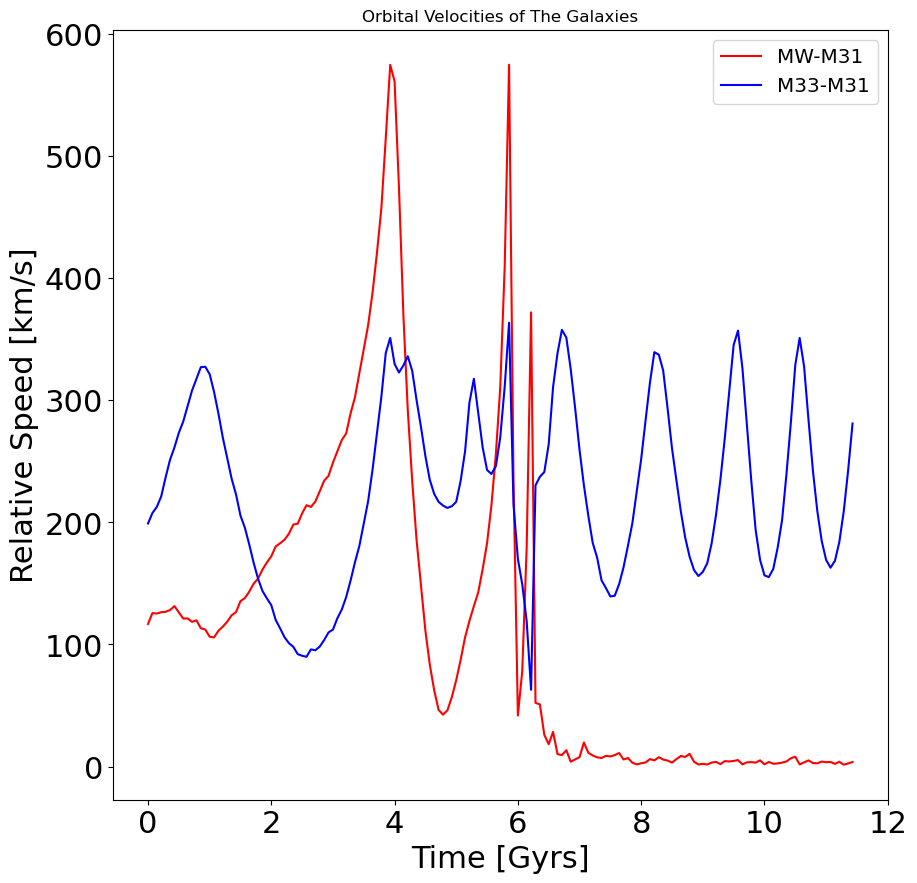

In [63]:
# Plot the orbital velocities of the galaxies 
#################################
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)

# Plotting:
plt.plot(time, MW_M31_rel_velocity, color="red", label="MW-M31")
plt.plot(time, M33_M31_rel_velocity, color="blue", label="M33-M31")

# Adding Title:
plt.title("Orbital Velocities of The Galaxies")

# Adding axis labels
plt.xlabel('Time [Gyrs]', fontsize=22)
plt.ylabel('Relative Speed [km/s]', fontsize=22)

# Adjusting tick label font size
label_size = 22
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size

# Adding a legend with some customizations
legend = ax.legend(loc='upper right',fontsize='x-large')

plt.savefig('orbital_velocities.png')

In [57]:
print("Question 1:")
print("MW and M31 experience 3 close encounters in the future with the third one being the final merger.")

Question 1:
MW and M31 experience 3 close encounters in the future with the third one being the final merger.


In [58]:
print("Question 2:")
print("When the seperation becomes the least, the velocity is the greatest. This is expected as the galaxies \
comes near each other, their relative velocities are at the highest value.")

Question 2:
When the seperation becomes the least, the velocity is the greatest. This is expected as the galaxies comes near each other, their relative velocities are at the highest value.


In [66]:
print("Question 3:")
print("MW and M31 will merge after about 6.25 Gyrs. M33 settles into a somewhat circular orbit with a slight radial damping.")

Question 3:
MW and M31 will merge after 6.25 Gyrs. M33 settles into a somewhat circular orbit with a slight radial damping (decay).


In [74]:
print("Question 4:")
print(f"Letting the difference between the appocenter be approximately 10 Kpc and the orbital time period be 1.25 Gyrs, \
the decay rate of M33's orbit after 6 Gyrs is {10/1.25} kpc / Gyrs. If it is at the distance of 75 kpc after the merger, \
it will take about {75/10/1.25} Gyrs after the MW+M31 merger happens to merge with the remnant.")

Question 4:
Letting the difference between the appocenter be approximately 10 Kpc and the orbital time period be 1.25 Gyrs, the decay rate of M33's orbit after 6 Gyrs is 8.0 kpc / Gyrs. If it is at the distance of 75 kpc after the merger, it will take about 6.0 Gyrs after the MW+M31 merger happens to merge with the remnant.
